In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pid = pd.read_excel('report.xlsx', sheet_name='PID Summary')

In [3]:
FYR = pid[pid['FYR  %'] < 97]
FYR

,Process Type,ItemNameType,FPY %,FYR %,Retest Rate %,Retest Rate(WO. ProductFail) %,Tested ESN QTY / Output,Avg Pass (sec),TestDate (UTC)
15,DescentG1_ProdScan,14422,83.81,95.95,33.9,30.47,593/569,104.229687,2021-09-20T02:35:54+00:00
16,inReach_mini2_Compass,13156,0.00,0.00,0.0,0.00,1/,NaN,2021-09-15T02:28:16+00:00
21,DescentG1_Solar_Felica_SPC,14657,0.00,50.00,250.0,250.00,2/2,30.000000,2021-09-16T04:14:06+00:00


In [4]:
# Split QTY and convert them into Int
pid['Tested ESN QTY'] = pid['Tested ESN QTY / Output'].apply(lambda qty : int(qty.split('/')[0]))

In [5]:
pid_retry_rate = pid[pid['Retest Rate %'] > 10].sort_values('Retest Rate %', ascending=False)

In [6]:
pid_retry_rate

,Process Type,ItemNameType,FPY %,FYR %,Retest Rate %,Retest Rate(WO. ProductFail) %,Tested ESN QTY / Output,Avg Pass (sec),TestDate (UTC),Tested ESN QTY
21,DescentG1_Solar_Felica_SPC,14657,0.00,50.00,250.00,250.00,2/2,30.000000,2021-09-16T04:14:06+00:00,2
19,DescentG1_EasyCardBundle,15244,76.54,100.00,40.74,41.25,81/81,33.844444,2021-09-18T10:39:39+00:00,81
23,RabbitCard_QC_TestEnv,14748,80.00,100.00,40.00,43.48,25/25,32.720000,2021-09-14T03:00:12+00:00,25
15,DescentG1_ProdScan,14422,83.81,95.95,33.90,30.47,593/569,104.229687,2021-09-20T02:35:54+00:00,593
17,DescentG1_Solar_FT,14379,90.75,99.70,25.67,24.77,335/335,32.887399,2021-09-20T13:10:11+00:00,335
5,DescentG1_FT1,13467,91.21,99.04,22.68,19.74,626/626,66.948301,2021-09-22T03:59:30+00:00,626
13,DescentG1_Gyro,13626,89.44,99.84,21.12,19.31,625/624,50.420814,2021-09-22T08:03:14+00:00,625
4,Airtight_table,8837,93.61,99.36,16.93,15.74,626/623,326.309384,2021-09-22T08:34:20+00:00,626
6,DescentG1_FT2,13469,93.93,99.68,16.93,15.01,626/626,146.340267,2021-09-22T06:07:28+00:00,626
2,DescentG1_CT,14035,91.89,99.68,15.90,14.17,629/627,58.017241,2021-09-22T02:49:10+00:00,629


In [7]:
# Load Test Result worksheet
test_result = pd.read_excel('report.xlsx', sheet_name='Test Result').sort_values('Retest%', ascending=False)

In [8]:
test_result

,ItemName Type,Process Type,Item,ItemName,Count/Count ESN,Retest%,Comment,Unnamed: 7
15,14657,DescentG1_Solar_Felica_SPC,23,Check Console Data Prefix,5/2,250.00,"It's a Felica issue, there is a little error w...",NaN
26,13156,inReach_mini2_Compass,6,Product Check,1/1,100.00,I don't know the failure? Maybe it was tested ...,NaN
4,14748,RabbitCard_QC_TestEnv,5,Compare Card ID to QC Tool,10/25,40.00,讀卡機顯示無法讀取機台，重測即PASS\nI think it may be softwar...,NaN
16,15244,DescentG1_EasyCardBundle,9,Balance check via reader,20/81,24.69,在機台12點鐘方向才可讀取餘額\nSimilar to the causes of othe...,NaN
25,14379,DescentG1_Solar_FT,24,[0.5sun] [IOP] Min VSOL Voltage,41/335,12.24,誤加的測項，已移除\nThe failed units may need more time...,NaN
...,...,...,...,...,...,...,...,...
119,13626,DescentG1_Gyro,6,Gyro 2nd 校準|Gyro 2nd Calibration,1/625,0.16,Can be fixed by retsting G-sensor.,NaN
121,13626,DescentG1_Gyro,9,Gyro Large-Value Bug Workaround,1/625,0.16,Passed bt retesting,NaN
122,13626,DescentG1_Gyro,21,Gyro平均旋轉速度 (CW #1~5),1/625,0.16,Passed bt retesting,NaN
123,13626,DescentG1_Gyro,36,Check FT3 Test Data,1/625,0.16,It had not been finished FT3 test before testi...,NaN


In [9]:
test_result_drop = test_result.drop_duplicates('Process Type')

In [10]:
final_result = pid_retry_rate.merge(how='left', on="Process Type", right=test_result_drop).sort_values('Retest Rate %', ascending=False)
final_result[['Process Type','Retest Rate %','Tested ESN QTY','Item','ItemName','Retest%','Comment']]

,Process Type,Retest Rate %,Tested ESN QTY,Item,ItemName,Retest%,Comment
0,DescentG1_Solar_Felica_SPC,250.00,2,23,Check Console Data Prefix,250.00,"It's a Felica issue, there is a little error w..."
1,DescentG1_EasyCardBundle,40.74,81,9,Balance check via reader,24.69,在機台12點鐘方向才可讀取餘額\nSimilar to the causes of othe...
2,RabbitCard_QC_TestEnv,40.00,25,5,Compare Card ID to QC Tool,40.00,讀卡機顯示無法讀取機台，重測即PASS\nI think it may be softwar...
3,DescentG1_ProdScan,33.90,593,6,[Solar1sun] 7446 Test_post[Voc],7.93,確認此測項需求性(移除or改下限or使用治具)\nThis station is for c...
4,DescentG1_Solar_FT,25.67,335,24,[0.5sun] [IOP] Min VSOL Voltage,12.24,誤加的測項，已移除\nThe failed units may need more time...
5,DescentG1_FT1,22.68,626,20,充電狀態 |Charging Status,4.79,The discharge is not completed
6,DescentG1_Gyro,21.12,625,22,Gyro Data X軸檢查 (CCW #1),4.16,"Product line leader told me, it's a computer p..."
7,Airtight_table,16.93,626,129,變形量絕對值超出規格_常壓,3.67,參數調整 常壓變形量過大或過小\nCompared with the last build...
8,DescentG1_FT2,16.93,626,27,電池電壓|Battery Voltage,3.83,Voltage has run out.
9,DescentG1_CT,15.90,629,15,溫度|Temperature,7.15,"The spec is defined with -5 to -35 degree, the..."


In [11]:
# Raw data

In [12]:
raw = pd.read_excel('report.xlsx', sheet_name='Raw data')

In [15]:
raw2 = raw.loc[(raw.ProcessType == 'DescentG1_Solar_FT') & (raw.Item24.between(600, 1000)),:]
raw2.shape

(374, 607)

<AxesSubplot:xlabel='Item24', ylabel='Count'>

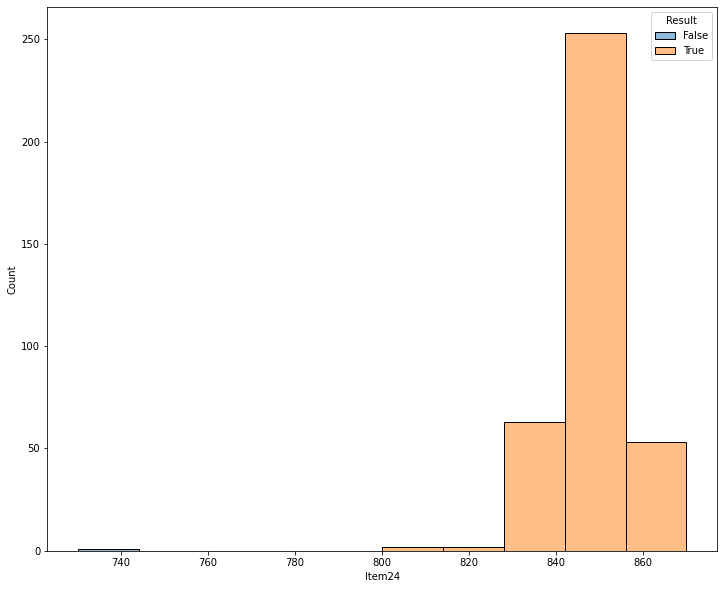

In [76]:
plt.figure(figsize=(12,10))
sns.histplot(data=raw2, x='Item24', hue='Result', bins=10)

In [82]:
raw2.Item24.value_counts()

850.0    253
840.0     55
860.0     52
830.0      8
820.0      2
730.0      1
870.0      1
800.0      1
810.0      1
Name: Item24, dtype: int64